This script contains the following points: Part 2

1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).
2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
a)In a markdown cell beneath your histogram, describe what the histogram demonstrates.
4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)
6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
a) In a markdown cell beneath your line chart, describe what the line chart shows.
7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
a) In a markdown cell beneath your scatterplot, describe what the scatterplot shows.
8. Export your visualizations as “.png” files in your relevant project folder.

1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [6]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# import pickle file of ords_prods_merge_customers_part_1
import pandas as pd

path = r'E:\Instacart Basket Analysis'
ords_prods_customers_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_customers_part_1.pkl'))


2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. a)In a markdown cell beneath your histogram, describe what the histogram demonstrates.

 3. Plotting bar chart and exporting that.

In [10]:
# ordering the observations from largest to smallestb
ords_prods_customers_merge.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,merge_flag_2
0,0,2539329,1,prior,1,2,8,11.114836,196,1,...,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,prior,2,3,7,15.000000,196,1,...,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,prior,3,3,12,21.000000,196,1,...,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,prior,4,4,7,29.000000,196,1,...,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,prior,5,4,15,28.000000,196,1,...,20.0,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,both


<Axes: xlabel='orders_day_of_week'>

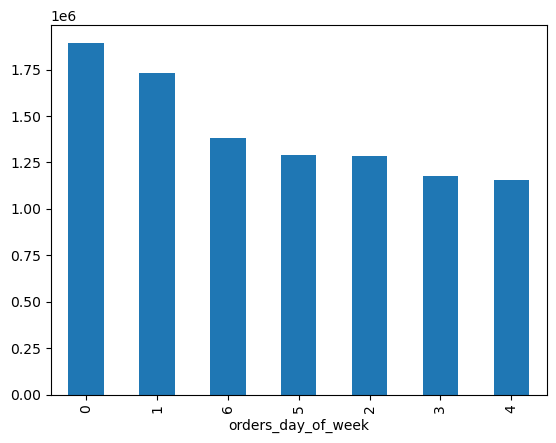

In [12]:
ords_prods_customers_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

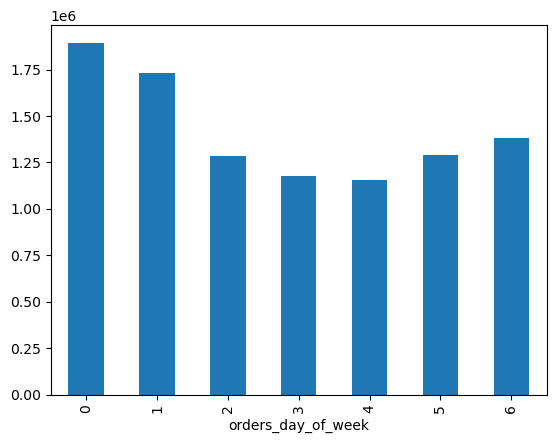

In [13]:
# sorting the bars in your chart according to their index order
ords_prods_customers_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

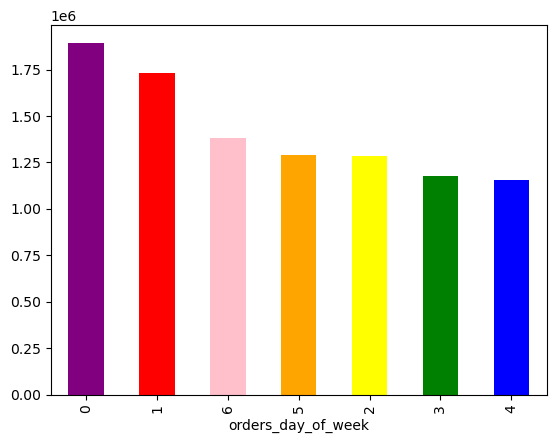

In [16]:
#making Bar chart colorful
bar = ords_prods_customers_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [17]:
#Exporting Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

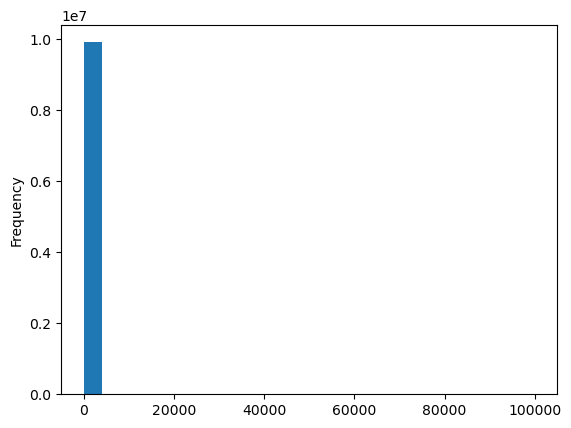

In [19]:
#Creating Histograms
ords_prods_customers_merge['prices'].plot.hist(bins = 25)

In [21]:
# let's check the data
ords_prods_customers_merge['prices'].describe()

count    9.918253e+06
mean     1.116030e+01
std      4.168003e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [22]:
ords_prods_customers_merge['prices'].mean()

11.160295709335097

In [23]:
ords_prods_customers_merge['prices'].median()

7.4

In [24]:
ords_prods_customers_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

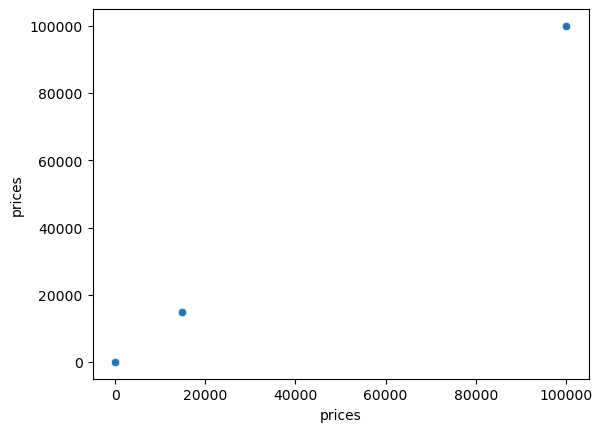

In [25]:
# Scatter plot for checking the data distribution
sns.scatterplot(x='prices', y='prices', data=ords_prods_customers_merge)

#something goes wrong hier, because the median and mean are in the same range and max prices is 99999 $ and it seems crazy! Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item.
so it means that we have outliers.

In [30]:
#findding outliers
ords_prods_customers_merge.loc[ords_prods_customers_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,merge_flag_2
7805,3075519,1435153,1519,prior,26,2,11,6.000000,21553,15,...,6.000000,Frequent customer.,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,3075520,1066435,1519,prior,32,3,10,5.000000,21553,28,...,6.000000,Frequent customer.,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,3075528,1697208,2409,prior,33,1,19,5.000000,21553,1,...,5.000000,Frequent customer.,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,8934397,965345,3531,prior,27,2,19,8.000000,33664,2,...,10.000000,Frequent customer.,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,3075545,2943740,3793,prior,1,2,9,11.114836,21553,3,...,11.114836,Regular customer.,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9876413,3076678,1479989,59561,prior,15,1,11,24.000000,21553,3,...,17.000000,Regular customer.,Male,Texas,33,9/21/2017,1,married,171368,both
9887500,8934508,3138833,51346,prior,1,6,4,11.114836,33664,1,...,11.114836,Regular customer.,Male,Rhode Island,58,1/25/2019,1,married,207497,both
9887501,8934509,1275440,51346,prior,3,2,7,11.000000,33664,5,...,11.114836,Regular customer.,Male,Rhode Island,58,1/25/2019,1,married,207497,both
9887502,8934510,3265389,51346,prior,4,1,17,13.000000,33664,2,...,11.114836,Regular customer.,Male,Rhode Island,58,1/25/2019,1,married,207497,both


In [31]:
 #marking them as missing values
ords_prods_customers_merge.loc[ords_prods_customers_merge['prices'] >100, 'prices'] = np.nan

In [32]:
#lets check whether the replacement was successful
ords_prods_customers_merge['prices'].max()

25.0

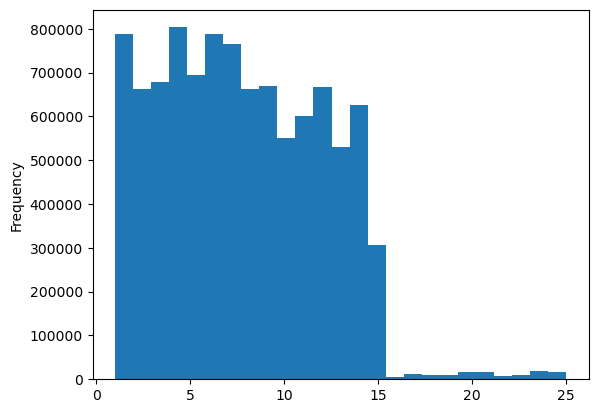

In [33]:
# Histograms
hist=ords_prods_customers_merge['prices'].plot.hist(bins = 25)

#most products are between  1 and 15, while a few are higher priced at  15 to 25.

In [34]:
#Exporting Histograms chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_orders_dow.png'))

The histogram shows the frequency of orders for each hour.
During night we can see lower frequency, that means less orders.
Then in early morning hours the nummber of orders increase and the high peak is achieved in the middle of the day.
After that time and until end of the day the number of orders decrease.
In conclusion I can say the customers prefer late morning and early afternoon to use Instacart.

5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [36]:
#Sampling Data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [37]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [38]:
big = ords_prods_customers_merge[dev]

In [39]:
small = ords_prods_customers_merge[~dev]

In [44]:
## A new dataframe that contains only the \"prices\" and \"order_hour_of_day\"
df_2 = small[['orders_day_of_week','prices']]

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


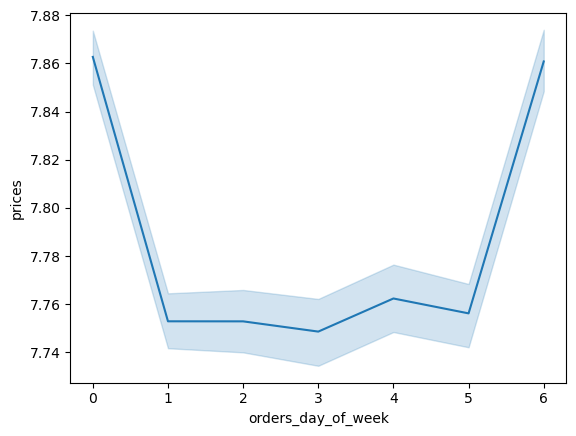

In [41]:
# line chart
line = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [42]:
ords_prods_customers_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918253 entries, 0 to 9918252
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int64   
 1   order_id                int64   
 2   user_id                 int64   
 3   eval_set                object  
 4   order_number            int64   
 5   orders_day_of_week      int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  _merge                  object  
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  merge_flag              object  
 17  busiest day             object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_orde

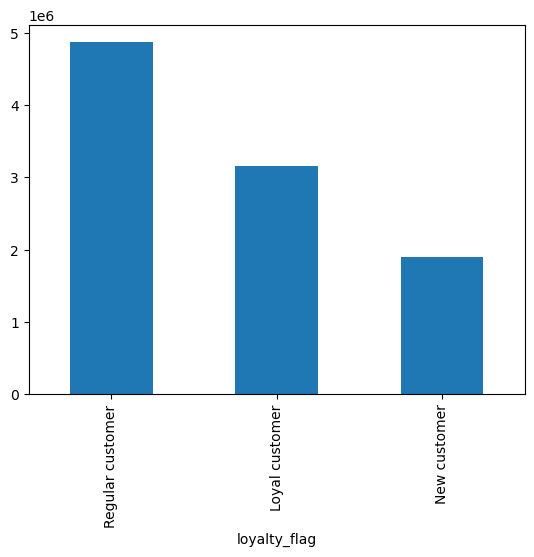

In [43]:
bar_2 = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: a) In a markdown cell beneath your line chart, describe what the line chart shows.

In [46]:
# Create a new dataframe that contains only the \"age\" and \"n_dependants\" columns from small subset
df_3 = small[['age','n_dependants']]

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


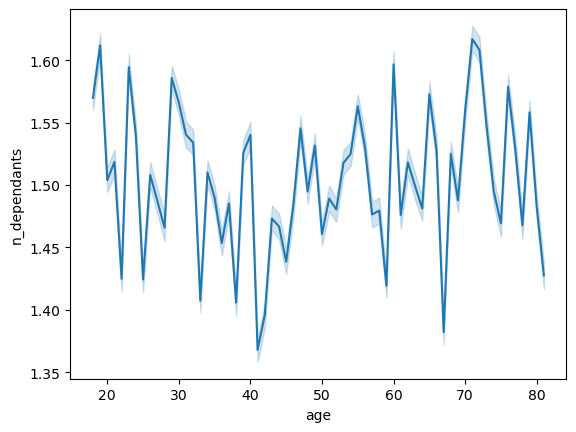

In [47]:
# Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

 There is no clear pattern between age and number of dependent.Also an increase in the younger people and a descrease in the older users.

7.You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. a) In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

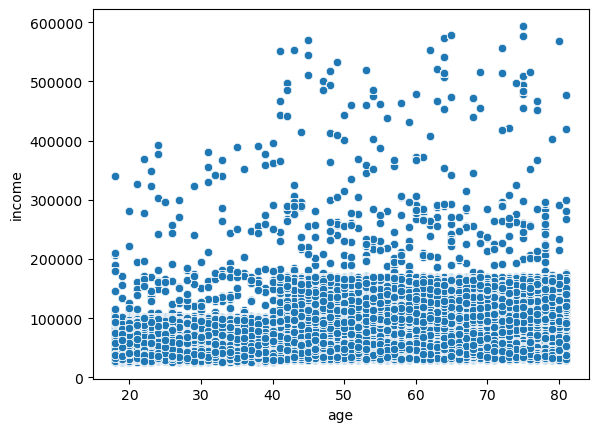

In [49]:
# Scatter plot 
scatter_2=sns.scatterplot(x='age', y='income', data=ords_prods_customers_merge)

 For all ages there is a concentration on the incomes lower than 200k.
 Younger people (until 40 years old) have incomes lower than 400k and with lower concentration between 200k and 400k and higher concentration on lower than 100k.
 From 40 years old onwards, it is possible to identify three different patterns:
  High concentration - incomes lower than 200k (+/-)
  medium concentration - incomes between 200 and 300k
  lower concentration - incomes higher than 300k

8. Export your visualizations as “.png” files in your relevant project folder.

In [54]:
#Exporting Bar chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_2_orders_dow.png'))

In [55]:
#Exporting line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_orders_dow.png'))

In [53]:
#Exporting Bar chart
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_2_orders_dow.png'))

In [56]:
# Export data to pkl

ords_prods_customers_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_customers_part_2.pkl'))